## Scrape Shots Data for 1 Specific Match

In [5]:
import requests

## Get the matchId from FotMob match url
params = {
    'matchId': '37.747.4111',
}

response = requests.get('https://www.fotmob.com/api/matchDetails', params=params)

In [6]:
data = response.json()
shotmap = data['content']['shotmap']['shots']

In [7]:
import pandas as pd

df = pd.DataFrame(shotmap)

In [8]:
df.head()

,id,eventType,teamId,playerId,playerName,x,y,min,minAdded,isBlocked,isOnTarget,blockedX,blockedY,goalCrossedY,goalCrossedZ,expectedGoals,expectedGoalsOnTarget,shotType,situation,period,isOwnGoal,onGoalShot,isSavedOffLine,isFromInsideBox,firstName,lastName,fullName,teamColor
0,2691635575,AttemptSaved,10260,1203665,Alejandro Garnacho,91.000000,21.687134,9,NaN,False,True,102.724138,31.63625,32.703750,1.059474,0.065655,0.0483,RightFoot,RegularPlay,FirstHalf,False,"{'x': 1.3429232804232825, 'y': 0.2802840420634...",False,True,Alejandro,Garnacho,Alejandro Garnacho,#C70101
1,2691636381,Miss,8456,815006,Phil Foden,104.336207,41.945937,10,NaN,False,False,NaN,NaN,38.620476,0.982421,0.025907,NaN,LeftFoot,RegularPlay,FirstHalf,False,"{'x': 0, 'y': 0.21262333295883812, 'zoomRatio'...",False,True,Phil,Foden,Phil Foden,#69A8D8
2,2691644847,AttemptSaved,10260,843099,Scott McTominay,92.800000,40.133333,21,NaN,True,True,94.482456,39.54500,33.542500,1.072316,0.063300,NaN,RightFoot,RegularPlay,FirstHalf,False,"{'x': 1.121031746031747, 'y': 0.28368142439153...",False,True,Scott,McTominay,Scott McTominay,#C70101
3,2691650853,Goal,10260,1203665,Alejandro Garnacho,98.245614,32.932500,30,NaN,False,True,NaN,NaN,33.085000,0.366000,0.932787,0.5772,RightFoot,RegularPlay,FirstHalf,False,"{'x': 1.2420634920634936, 'y': 0.0968253963492...",False,True,Alejandro,Garnacho,Alejandro Garnacho,#C70101
4,2691656473,AttemptSaved,8456,488139,Bernardo Silva,79.556796,26.774048,37,NaN,False,True,103.103448,33.46625,33.771250,0.526526,0.019214,0.0166,LeftFoot,RegularPlay,FirstHalf,False,"{'x': 1.0605158730158726, 'y': 0.1392926754497...",False,False,Bernardo,Silva,Bernardo Silva,#69A8D8


In [14]:
df.columns

Index(['id', 'eventType', 'teamId', 'playerId', 'playerName', 'x', 'y', 'min',
       'minAdded', 'isBlocked', 'isOnTarget', 'blockedX', 'blockedY',
       'goalCrossedY', 'goalCrossedZ', 'expectedGoals',
       'expectedGoalsOnTarget', 'shotType', 'situation', 'period', 'isOwnGoal',
       'onGoalShot', 'isSavedOffLine', 'isFromInsideBox', 'firstName',
       'lastName', 'fullName', 'teamColor'],
      dtype='object')

In [6]:
df_shots = df[['goalCrossedY', 'goalCrossedZ','eventType','isBlocked','isOwnGoal']]

In [7]:
df_shots.head()

,goalCrossedY,goalCrossedZ,eventType,isBlocked,isOwnGoal
0,32.703750,1.059474,AttemptSaved,False,False
1,38.620476,0.982421,Miss,False,False
2,33.542500,1.072316,AttemptSaved,True,False
3,33.085000,0.366000,Goal,False,False
4,33.771250,0.526526,AttemptSaved,False,False
5,19.655287,0.982421,Miss,False,False
6,32.780000,0.327474,Goal,False,False
7,34.686250,1.220000,AttemptSaved,True,False
8,36.897500,4.940966,Miss,False,False
9,25.244688,0.089895,Miss,False,False


In [19]:
df_shots['eventType'].unique()

array(['AttemptSaved', 'Miss', 'Goal', 'Post'], dtype=object)

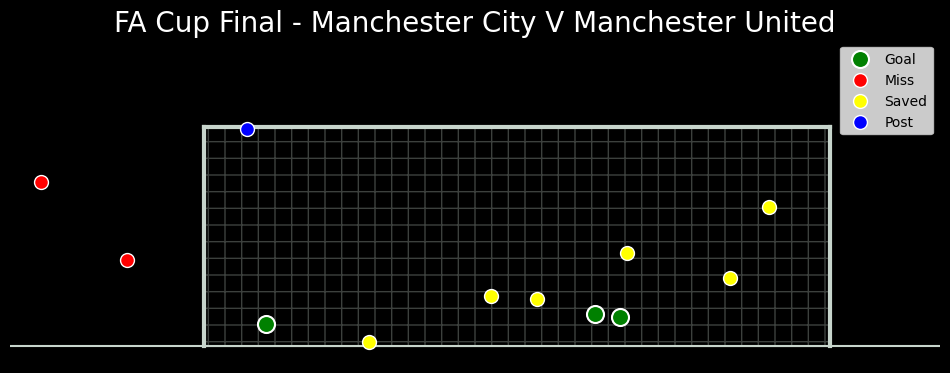

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mplsoccer import Pitch, VerticalPitch, FontManager
from mplsoccer import Sbopen
from matplotlib.patches import Rectangle

#Create figure
fig=plt.figure(facecolor='black')
fig.set_size_inches(12, 4.2)

#plt.gca().invert_xaxis()

# Goal post lines (shifted to the left by 1 unit)
plt.plot([27.4, 39], [0, 0], color='#c7d5cc', linewidth=1.5)
plt.plot([30.3, 37.7], [2.5, 2.5], color='#c7d5cc', linewidth=3)
plt.plot([37.7, 37.7], [0, 2.5], color='#c7d5cc', linewidth=3)
plt.plot([30.3, 30.3], [0, 2.5], color='#c7d5cc', linewidth=3)

# Goal net (shifted to the left by 1 unit)
plt.gca().add_patch(Rectangle((30.3, 0), 7.4, 2.5, fill=False, edgecolor='#c7d5cc', hatch='+', alpha=0.3))

plt.gca().invert_yaxis()
#Tidy Axes
plt.axis('off')

plt.title("FA Cup Final - Manchester City V Manchester United",color='white', fontsize=20)

goal_mask = (df_shots.eventType == 'Goal') & (df_shots.isOwnGoal == False) 
sc1 = plt.scatter(67.4 - df_shots[goal_mask].goalCrossedY, df_shots[goal_mask].goalCrossedZ,marker='o', color='green', label='Goal',s=150,zorder=2,edgecolors = 'white',linewidths=1.5)

miss_mask = (df_shots.eventType == 'Miss') & (df_shots.isBlocked == False) 
sc2 = plt.scatter(67.4 - df_shots[miss_mask].goalCrossedY, df_shots[miss_mask].goalCrossedZ,marker='o', color='red', label='Miss',s=100,zorder=2,edgecolors = 'white',linewidths=1)

saved_mask = (df_shots.eventType == 'AttemptSaved') & (df_shots.isBlocked == False) 
sc3 = plt.scatter(67.4 - df_shots[saved_mask].goalCrossedY, df_shots[saved_mask].goalCrossedZ,marker='o', color='yellow', label='Saved',s=100,zorder=2,edgecolors = 'white',linewidths=1)

post_mask = df_shots.eventType == 'Post'
sc4 = plt.scatter(67.4 - df_shots[post_mask].goalCrossedY, df_shots[post_mask].goalCrossedZ,marker='o', color='blue', label='Post',s=100,zorder=2,edgecolors = 'white',linewidths=1)

plt.ylim(ymin=-0.2, ymax=3.5)
plt.xlim(xmin=27.4, xmax=39)
plt.legend()

plt.savefig('C:/Users/acer/Desktop/IndianCityzen/Projects/Images/OnGoalShotMap.png',dpi=300,bbox_inches = 'tight',facecolor='black')

## Scrape Shots Data For All Matches in a Season

In [2]:
%𝐥𝐨𝐚𝐝_𝐞𝐱𝐭 𝐜𝐮𝐝𝐟.𝐩𝐚𝐧𝐝𝐚𝐬

UsageError: Line magic function `%𝐥𝐨𝐚𝐝_𝐞𝐱𝐭` not found.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.markers import MarkerStyle
from mplsoccer.pitch import Pitch
from mplsoccer import Pitch, VerticalPitch

from highlight_text import ax_text, fig_text
from PIL import Image
from mplsoccer import add_image
from urllib.request import urlopen

import requests

import matplotlib.image as mpimg
import matplotlib.patches as patches
from PIL import Image
from io import BytesIO
import highlight_text
import matplotlib as mpl
from matplotlib.gridspec import GridSpec
from mplsoccer import Pitch, VerticalPitch
import matplotlib.image as mpimg
import matplotlib.patches as patches
from PIL import Image
from io import BytesIO
from mplsoccer import PyPizza, add_image, FontManager
from matplotlib.patches import Rectangle
import matplotlib.font_manager as font_manager
import soccerdata as sd
from matplotlib.lines import Line2D
import soccerdata as sd
from matplotlib.colors import to_rgba

pd.set_option('display.max_columns', None)

[06/09/24 16:39:09] INFO     No custom team name replacements found. You can configure these in       ]8;id=745180;file://C:\Users\acer\AppData\Local\Programs\Python\Python310\lib\site-packages\soccerdata\_config.py\_config.py]8;;\:]8;id=256470;file://C:\Users\acer\AppData\Local\Programs\Python\Python310\lib\site-packages\soccerdata\_config.py#87\87]8;;\
                             C:\Users\acer\soccerdata\config\teamname_replacements.json.                           

                    INFO     No custom league dict found. You can configure additional leagues in    ]8;id=310397;file://C:\Users\acer\AppData\Local\Programs\Python\Python310\lib\site-packages\soccerdata\_config.py\_config.py]8;;\:]8;id=577381;file://C:\Users\acer\AppData\Local\Programs\Python\Python310\lib\site-packages\soccerdata\_config.py#177\177]8;;\
                             C:\Users\acer\soccerdata\config\league_dict.json.                                     

In [16]:
# Define the function to scrape shot data for a given matchId
def scrape_shots(mi):
    try: 
        params = {'matchId': mi}
        response = requests.get('https://www.fotmob.com/api/matchDetails', params=params)
        data = response.json()
        shotmap = data['content']['shotmap']['shots']
        shots_df = pd.DataFrame(shotmap)
        shots_df['matchId'] = mi
        return shots_df
    except Exception as e:
        print("Data not able to be scraped for MatchID : ",mi)

# Read the CSV containing the team names according to their respective Fotmob teamId
df_teamNameId = pd.read_csv("teams_name_and_id.csv")

# Define your list of matchIds (mi)
first_matchId = 3900932
last_matchId = 3901311
match_ids = [first_matchId + i for i in range(461)]  

# Initialize an empty list to store individual DataFrames
all_shots_dfs = []

# Loop through each matchId, scrape the shots data, merge with team names, and append to the list
for fotmob_matchId in match_ids:
    #print(fotmob_matchId)
    shots_df = scrape_shots(fotmob_matchId)
    if shots_df is not None:
        shots_df = shots_df.merge(df_teamNameId[['teamId', 'teamName']], on='teamId', how='left')
    
        # Adding the opposition team name column
        team1 = shots_df['teamName'].unique()[0]
        team2 = shots_df['teamName'].unique()[1]
        
        def get_opposite_teamName(team):
            if team == team1:
                return team2
            elif team == team2:
                return team1
            else:
                return None
    
        # Apply the function to create the new column
        shots_df['oppositeTeam'] = shots_df['teamName'].apply(get_opposite_teamName)
        
        # Append the DataFrame to the list
        all_shots_dfs.append(shots_df)

# Concatenate all DataFrames in the list into a single DataFrame
final_shots_df = pd.concat(all_shots_dfs, ignore_index=True)

# Cross cheking if all the data has extracted succesfully or not
print(len(final_shots_df))

IndexError: index 1 is out of bounds for axis 0 with size 1

In [17]:
shots_df.head()

,id,eventType,teamId,playerId,playerName,x,y,min,minAdded,isBlocked,isOnTarget,blockedX,blockedY,goalCrossedY,goalCrossedZ,expectedGoals,expectedGoalsOnTarget,shotType,situation,period,isOwnGoal,onGoalShot,isSavedOffLine,firstName,lastName,fullName,teamColor,matchId,teamName
0,2445298987,AttemptSaved,8463,302241,Patrick Bamford,100.258621,42.466250,12,NaN,True,True,101.491379,41.141905,36.516250,1.220000,0.099086,NaN,LeftFoot,RegularPlay,FirstHalf,False,"{'x': 0.33432539682539697, 'y': 0.322751321164...",False,Patrick,Bamford,Patrick Bamford,#0060A0,3900950,NaN
1,2445309689,Miss,8463,302241,Patrick Bamford,100.922414,42.119375,17,NaN,False,False,NaN,NaN,41.057857,2.228105,0.125842,NaN,LeftFoot,RegularPlay,FirstHalf,False,"{'x': 0, 'y': 0.31569146371995366, 'zoomRatio'...",False,Patrick,Bamford,Patrick Bamford,#0060A0,3900950,NaN
2,2445311745,AttemptSaved,8466,237563,Stuart Armstrong,93.100000,32.856250,18,NaN,True,True,95.833333,32.780000,32.475000,1.220000,0.079770,NaN,RightFoot,RegularPlay,FirstHalf,False,"{'x': 1.4034391534391548, 'y': 0.3227513211640...",False,Stuart,Armstrong,Stuart Armstrong,#d71920,3900950,NaN
3,2445314591,Miss,8466,261936,Mohamed Elyounoussi,93.400000,50.306497,20,NaN,False,False,NaN,NaN,21.056561,0.622842,0.019740,NaN,RightFoot,ThrowInSetPiece,FirstHalf,False,"{'x': 2, 'y': 0.048120293127707804, 'zoomRatio...",False,Mohamed,Elyounoussi,Mohamed Elyounoussi,#d71920,3900950,NaN
4,2445315505,Miss,8466,599353,Che Adams,86.997059,45.682293,20,NaN,False,False,93.500000,37.780000,22.738089,0.712737,0.119776,NaN,RightFoot,RegularPlay,FirstHalf,False,"{'x': 2, 'y': 0.06328738077799652, 'zoomRatio'...",False,Che,Adams,Che Adams,#d71920,3900950,NaN


In [5]:
final_shots_df.shape

(10522, 32)

In [6]:
final_shots_df.columns

Index(['id', 'eventType', 'teamId', 'playerId', 'playerName', 'x', 'y', 'min',
       'minAdded', 'isBlocked', 'isOnTarget', 'blockedX', 'blockedY',
       'goalCrossedY', 'goalCrossedZ', 'expectedGoals',
       'expectedGoalsOnTarget', 'shotType', 'situation', 'period', 'isOwnGoal',
       'onGoalShot', 'isSavedOffLine', 'firstName', 'lastName', 'fullName',
       'teamColor', 'matchId', 'teamName', 'oppositeTeam', 'shortName',
       'isFromInsideBox'],
      dtype='object')

## Phil Foden Shots

In [79]:
man_city_shots = final_shots_df.loc[final_shots_df['playerName'] == 'Phil Foden']

In [114]:
man_city_shots.tail()

,id,eventType,teamId,playerId,playerName,x,y,min,minAdded,isBlocked,isOnTarget,blockedX,blockedY,goalCrossedY,goalCrossedZ,expectedGoals,expectedGoalsOnTarget,shotType,situation,period,isOwnGoal,onGoalShot,isSavedOffLine,firstName,lastName,fullName,teamColor,matchId,teamName,oppositeTeam,shortName,isFromInsideBox,zone
10473,2689651125,Goal,8456,815006,Phil Foden,92.900000,35.296250,18,NaN,False,True,NaN,NaN,31.788750,1.014526,0.087168,0.1888,LeftFoot,RegularPlay,FirstHalf,False,"{'x': 1.5849867724867723, 'y': 0.2683932039153...",False,Phil,Foden,Phil Foden,#69A8D8,4193909,Man City,West Ham,NaN,True,bottom left
10475,2689658347,AttemptSaved,8456,815006,Phil Foden,78.543204,22.457834,24,NaN,False,True,103.482759,33.16125,33.771250,2.029053,0.023719,0.0476,LeftFoot,RegularPlay,FirstHalf,False,"{'x': 1.0605158730158726, 'y': 0.5367864078306...",False,Phil,Foden,Phil Foden,#69A8D8,4193909,Man City,West Ham,NaN,False,top center
10485,2689694333,Miss,8456,815006,Phil Foden,78.205340,27.446429,51,NaN,False,False,NaN,NaN,40.469524,1.695158,0.028203,NaN,LeftFoot,RegularPlay,SecondHalf,False,"{'x': 1.1102230246251565e-16, 'y': 0.262022049...",False,Phil,Foden,Phil Foden,#69A8D8,4193909,Man City,West Ham,NaN,False,NaN
10488,2689706409,AttemptSaved,8456,815006,Phil Foden,94.675439,16.292229,63,NaN,False,True,103.577586,30.30400,32.093750,0.648526,0.020572,0.0485,LeftFoot,FromCorner,SecondHalf,False,"{'x': 1.5042989417989419, 'y': 0.1715678075661...",False,Phil,Foden,Phil Foden,#69A8D8,4193909,Man City,West Ham,NaN,True,bottom left
10493,2689716111,Miss,8456,815006,Phil Foden,84.624757,49.255541,74,NaN,False,False,NaN,NaN,38.788571,0.622842,0.054439,NaN,LeftFoot,FreeKick,SecondHalf,False,"{'x': 0, 'y': 0.13006845805785555, 'zoomRatio'...",False,Phil,Foden,Phil Foden,#69A8D8,4193909,Man City,West Ham,NaN,False,NaN


In [41]:
man_city_shots.shape

(105, 32)

In [14]:
man_city_shots['shotType'].value_counts()

shotType
RightFoot         317
LeftFoot          292
Header             80
OtherBodyParts      5
Name: count, dtype: int64

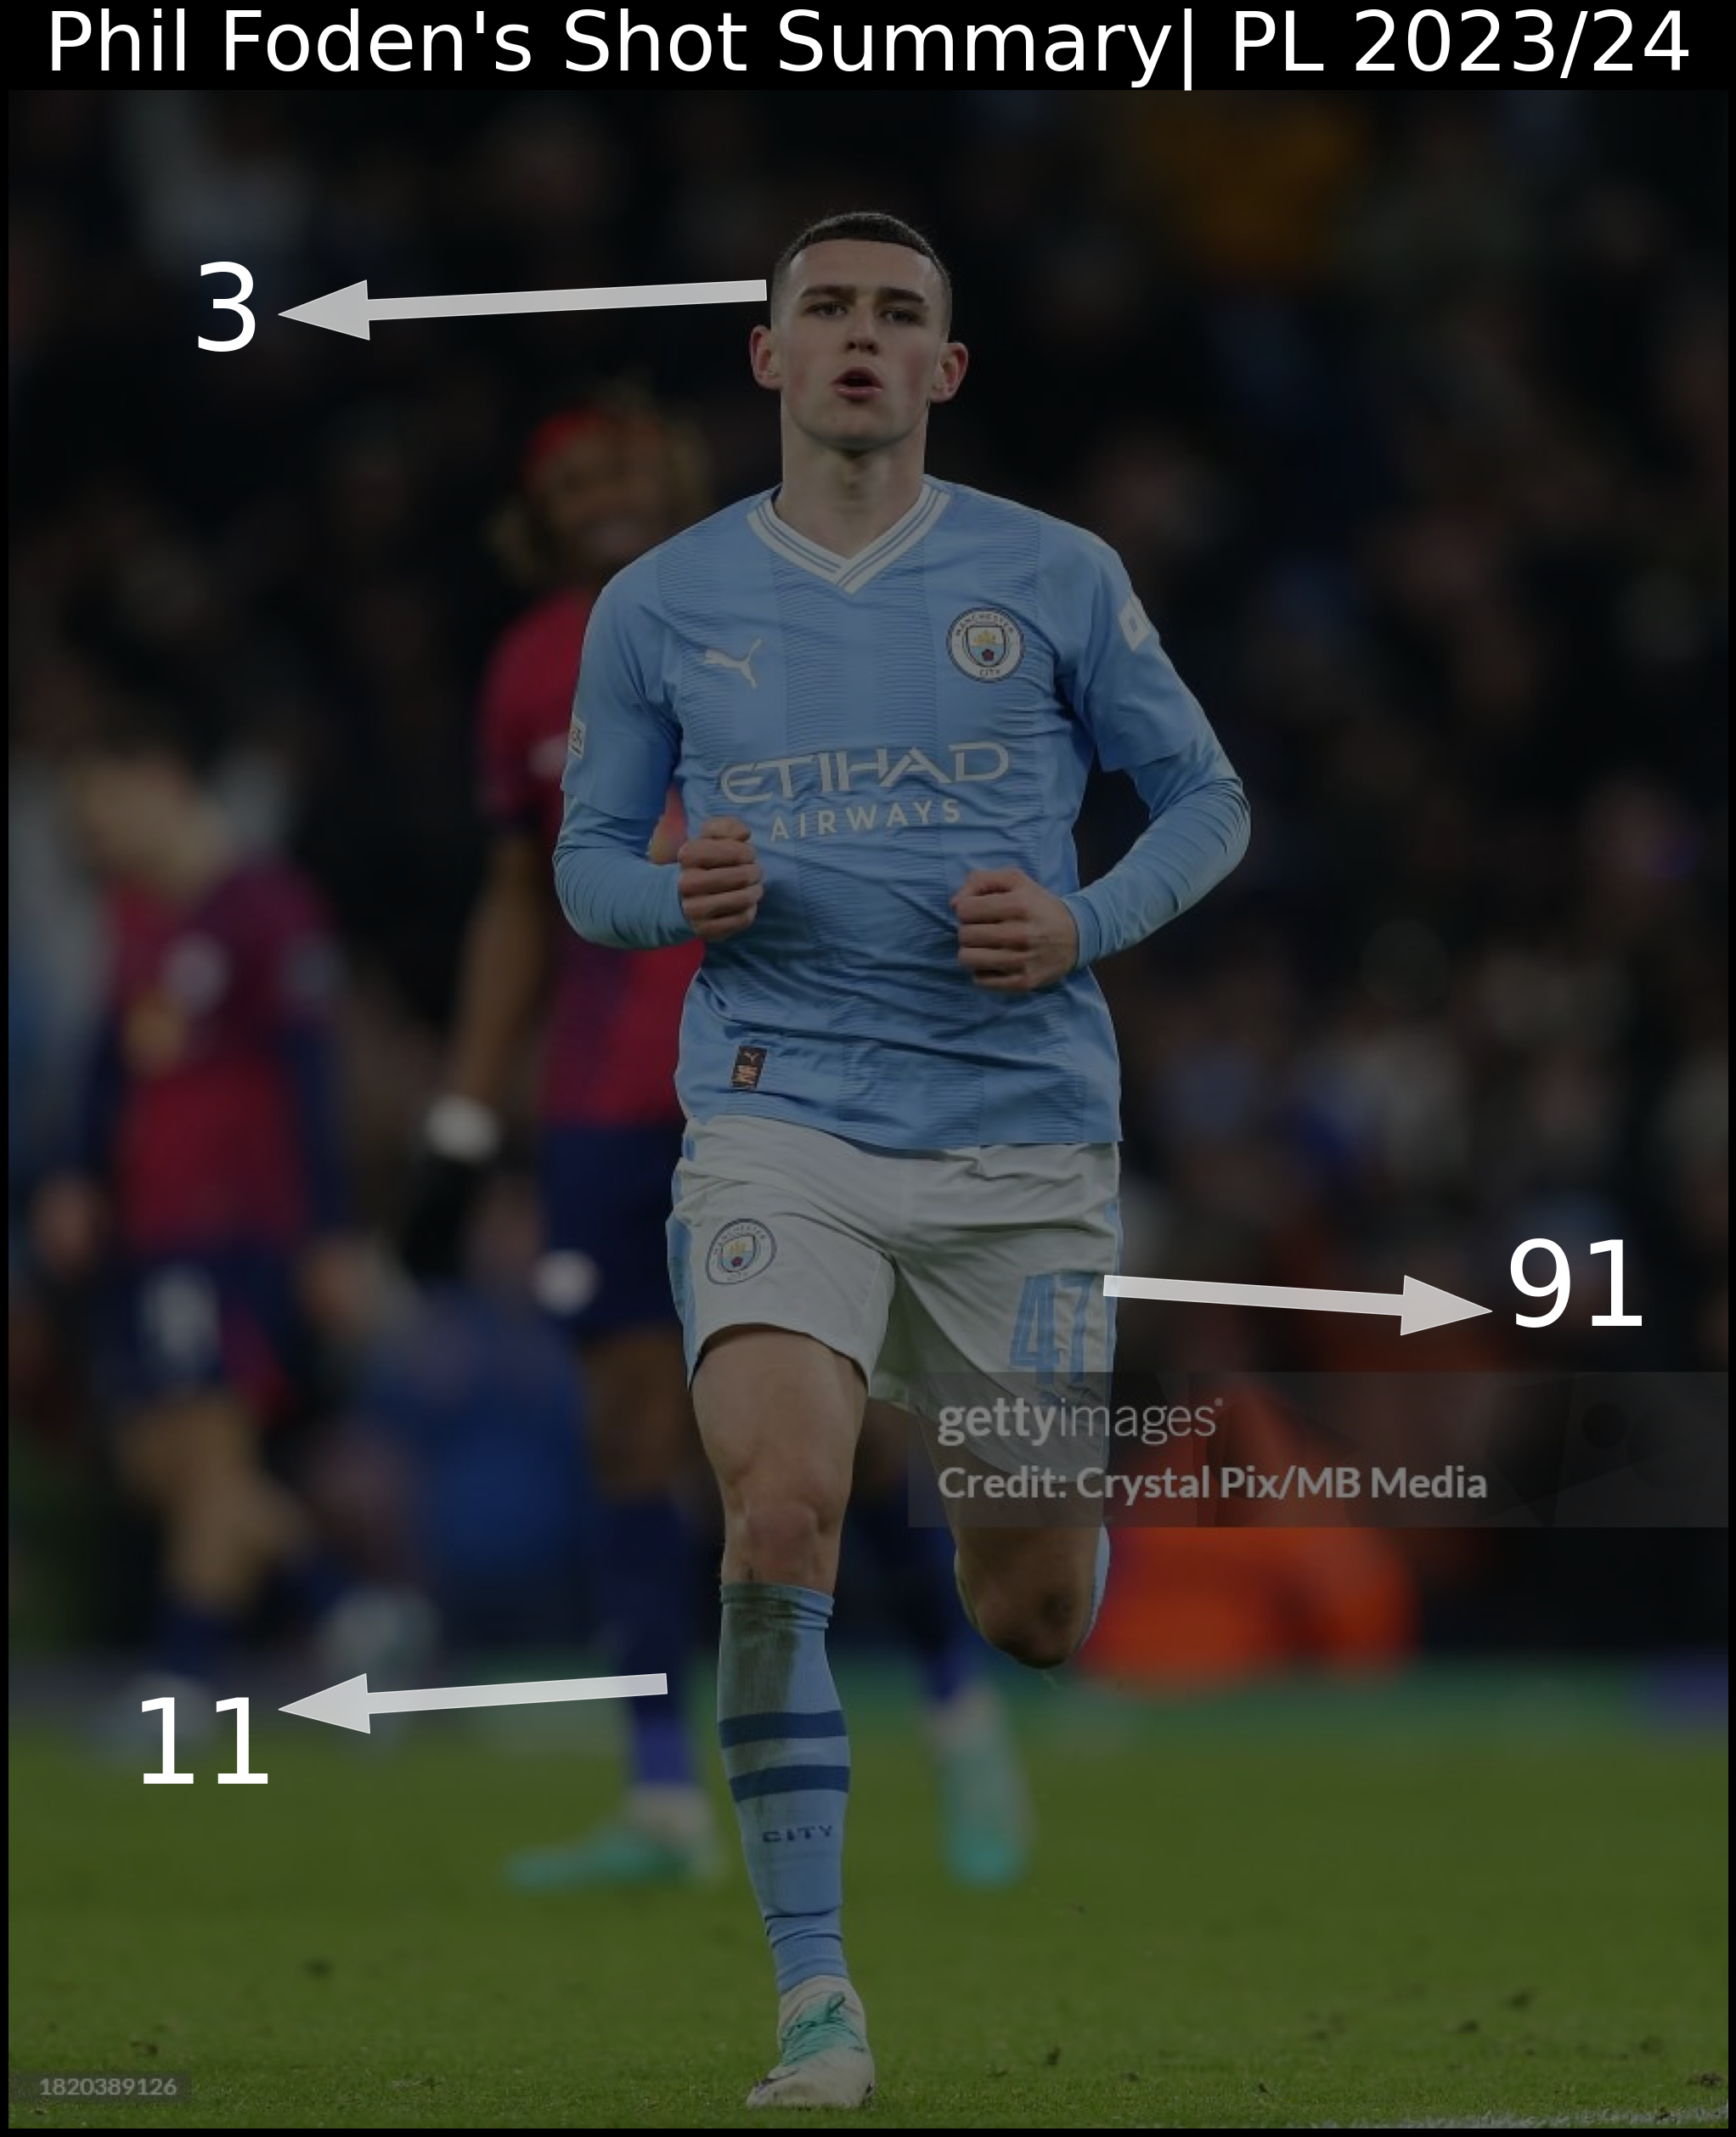

In [245]:
from mplsoccer import PyPizza, add_image, FontManager
fig=plt.figure(facecolor='black')
#fig.set_size_inches(15, 5)
player = 'Phil Foden'
img_player = mpimg.imread(f'C:/Users/acer/Desktop/IndianCityzen/Projects/Images/Players/{player}.jpg')

ax_image = add_image(
    img_player, fig, left=20, bottom=5, width=5, height=5,aspect='equal',alpha=0.5
)

# Get the value counts for the 'shotType' column
shot_counts = man_city_shots['shotType'].value_counts()

# Extract individual counts into separate variables
LeftFoot = shot_counts['LeftFoot']
RightFoot = shot_counts['RightFoot']
Header = shot_counts['Header']

# Coordinates of the arrow base
x1, y1 = 380, 100
x2,y2 = 330,800
x3,y3 = 550,600

# Length of the arrow in x and y direction
dx1, dy1 = -200, 10
dx2 , dy2 = -150,10
dx3,dy3 = 150,10

# Create the arrow
arrow1 = plt.arrow(x1, y1, dx1, dy1,zorder=2,color='white',width=10,alpha=0.7)
arrow2 = plt.arrow(x2, y2, dx2, dy2,zorder=2,color='white',width=10,alpha=0.7)
arrow3 = plt.arrow(x3, y3, dx3, dy3,zorder=2,color='white',width=10,alpha=0.7)

# Text position (slightly adjusted based on arrowhead size)
plt.title("Phil Foden's Shot Summary| PL 2023/24",ha='center',color='white',size=70)
# Add text annotation with arrowprops for alignment
plt.annotate(Header, xy=(330,50), xytext=(90,130), color='white',fontsize=100,zorder=2)
plt.annotate(RightFoot, xy=(330,800), xytext=(60,850), color='white',fontsize=100,zorder=2)
plt.annotate(LeftFoot, xy=(330,800), xytext=(750,620), color='white',fontsize=100,zorder=2)

plt.savefig('C:/Users/acer/Desktop/IndianCityzen/Projects/Images/ShotMaps/FodenShotSummary.png',dpi=300,bbox_inches = 'tight',facecolor='black')

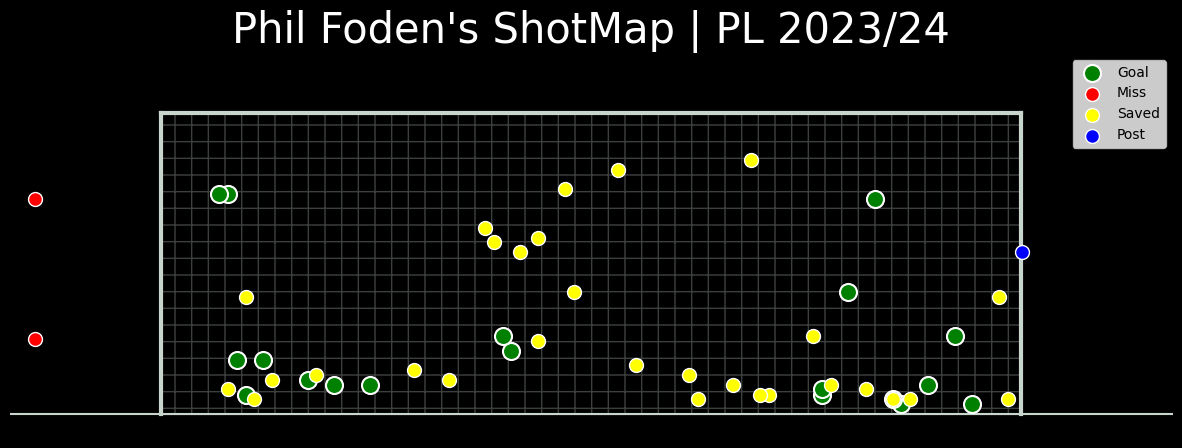

In [165]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mplsoccer import Pitch, VerticalPitch, FontManager
from mplsoccer import Sbopen
from matplotlib.patches import Rectangle

#Create figure
fig=plt.figure(facecolor='black')
fig.set_size_inches(15, 5)

#plt.gca().invert_xaxis()

# Goal post lines (shifted to the left by 1 unit)
plt.plot([29, 39], [0, 0], color='#c7d5cc', linewidth=1.5)
plt.plot([30.3, 37.7], [2.5, 2.5], color='#c7d5cc', linewidth=3)
plt.plot([37.7, 37.7], [0, 2.5], color='#c7d5cc', linewidth=3)
plt.plot([30.3, 30.3], [0, 2.5], color='#c7d5cc', linewidth=3)

# Goal net (shifted to the left by 1 unit)
plt.gca().add_patch(Rectangle((30.3, 0), 7.4, 2.5, fill=False, edgecolor='#c7d5cc', hatch='+', alpha=0.3))

#plt.gca().invert_yaxis()
#Tidy Axes
plt.axis('off')

plt.title("Phil Foden's ShotMap | PL 2023/24",color='white', fontsize=30,ha='center')

goal_mask = (man_city_shots.eventType == 'Goal') & (man_city_shots.isOwnGoal == False) 
sc1 = plt.scatter(68 - man_city_shots[goal_mask].goalCrossedY, man_city_shots[goal_mask].goalCrossedZ,marker='o', color='green', label='Goal',s=150,zorder=2,edgecolors = 'white',linewidths=1.5)

miss_mask = (man_city_shots.eventType == 'Miss') & (man_city_shots.isBlocked == False) 
sc2 = plt.scatter(68 - man_city_shots[miss_mask].goalCrossedY, man_city_shots[miss_mask].goalCrossedZ,marker='o', color='red', label='Miss',s=100,zorder=2,edgecolors = 'white',linewidths=1)

saved_mask = (man_city_shots.eventType == 'AttemptSaved') & (man_city_shots.isBlocked == False) 
sc3 = plt.scatter(68 - man_city_shots[saved_mask].goalCrossedY, man_city_shots[saved_mask].goalCrossedZ,marker='o', color='yellow', label='Saved',s=100,zorder=2,edgecolors = 'white',linewidths=1)

post_mask = man_city_shots.eventType == 'Post'
sc4 = plt.scatter(68 - man_city_shots[post_mask].goalCrossedY, man_city_shots[post_mask].goalCrossedZ,marker='o', color='blue', label='Post',s=100,zorder=2,edgecolors = 'white',linewidths=1)

plt.ylim(ymin=-0.2, ymax=3)
plt.xlim(xmin=29, xmax=39)
plt.legend(loc='best')

plt.savefig('C:/Users/acer/Desktop/IndianCityzen/Projects/Images/ShotMaps/FodenShotMap.png',dpi=300,bbox_inches = 'tight',facecolor='black')

In [10]:
def zone(row):
  if row['goalCrossedY'] > 30.3 and row['goalCrossedY'] < 37.7 and row['goalCrossedZ'] < 2.5:
    if row['goalCrossedY'] < 30.3+8/3:
      zone_h = 'left'
    elif row['goalCrossedY'] >= 30.3+8/3 and row['goalCrossedY'] < 30.3+2*8/3:
      zone_h = 'center'
    else:
      zone_h = 'right'

    if row['goalCrossedZ'] < 2.5/2:
      zone_v = 'bottom'
    else:
      zone_v = 'top'
    zone = zone_v+' '+zone_h
    return zone
  else:
    return np.nan

In [101]:
man_city_shots['zone'] = man_city_shots.apply(lambda x:zone(x), axis=1)

C:\Users\acer\AppData\Local\Temp\ipykernel_62572\530037463.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  phil_foden_shots['zone'] = phil_foden_shots.apply(lambda x:zone(x), axis=1)


In [15]:
man_city_shots.zone.value_counts()

zone
bottom center    210
bottom left      105
bottom right      99
top center        35
top right         20
top left          19
Name: count, dtype: int64

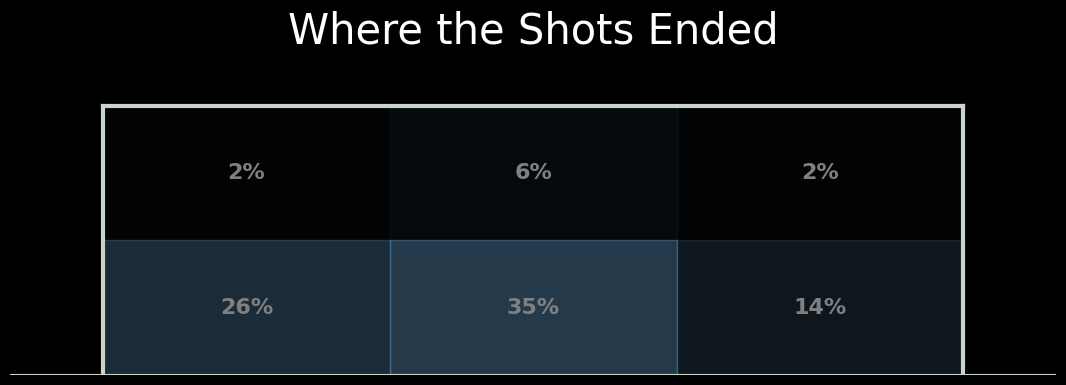

In [166]:
from matplotlib.patches import Rectangle

#Create figure
fig=plt.figure(facecolor='black')
fig.set_size_inches(13.5, 4.2)

#Goal post lines
plt.plot([29.5, 38.5], [0, 0], color='#c7d5cc', linewidth=1.5)
plt.plot([30.3, 37.7], [2.5, 2.5], color='#c7d5cc', linewidth=3)
plt.plot([37.7, 37.7], [0, 2.5], color='#c7d5cc', linewidth=3)
plt.plot([30.3, 30.3], [0, 2.5], color='#c7d5cc', linewidth=3)

# Goal net (shifted to the left by 1 unit)
#plt.gca().add_patch(Rectangle((30.3, 0), 7.4, 2.5, fill=False, edgecolor='#c7d5cc', hatch='+', alpha=0.3))

total_shot = len(man_city_shots)
percentage = {}
for zone in man_city_shots['zone'].unique():
  percentage[zone] = round(len(man_city_shots.loc[man_city_shots['zone']==zone])/total_shot, 2)

#zone
plt.gca().add_patch(Rectangle((30.3, 0), 7.4/3, 2.5/2, color='#69A8D8', alpha=percentage['bottom left'])) # bottom left
plt.gca().add_patch(Rectangle((30.3, 2.5/2), 7.4/3, 2.5/2, color='#69A8D8', alpha=percentage['top left'])) # top left
plt.gca().add_patch(Rectangle((30.3+7.4/3, 0), 7.4/3, 2.5/2, color='#69A8D8', alpha=percentage['bottom center'])) # bottom center
plt.gca().add_patch(Rectangle((30.3+7.4/3, 2.5/2), 7.4/3, 2.5/2, color='#69A8D8', alpha=percentage['top center'])) # top center
plt.gca().add_patch(Rectangle((30.3+2*7.4/3, 0), 7.4/3, 2.5/2, color='#69A8D8', alpha=percentage['bottom right'])) # bottom right
plt.gca().add_patch(Rectangle((30.3+2*7.4/3, 2.5/2), 7.4/3, 2.5/2, color='#69A8D8', alpha=percentage['top right'])) # top right


#Tidy Axes
plt.axis('off')

plt.title("Where the Shots Ended",color='white', fontsize=30,ha='center')

plt.text(x=30.3+7.4/6, y=2.5/4, s="{}%".format(round(100*percentage['bottom left'])), color='gray', fontsize=16, weight="bold", ha='center', va='center')
plt.text(x=30.3+7.4/6, y=3*2.5/4, s="{}%".format(round(100*percentage['top left'])), color='gray', fontsize=16, weight="bold", ha='center', va='center')
plt.text(x=30.3+3*7.4/6, y=2.5/4, s="{}%".format(round(100*percentage['bottom center'])), color='gray', fontsize=16, weight="bold", ha='center', va='center')
plt.text(x=30.3+3*7.4/6, y=3*2.5/4, s="{}%".format(round(100*percentage['top center'])), color='gray', fontsize=16, weight="bold", ha='center', va='center')
plt.text(x=30.3+5*7.4/6, y=2.5/4, s="{}%".format(round(100*percentage['bottom right'])), color='gray', fontsize=16, weight="bold", ha='center', va='center')
plt.text(x=30.3+5*7.4/6, y=3*2.5/4, s="{}%".format(round(100*percentage['top right'])), color='gray', fontsize=16, weight="bold", ha='center', va='center')


plt.ylim(ymin=0, ymax=3)
plt.xlim(xmin=29.5, xmax=38.5)
# plt.legend()
plt.savefig('C:/Users/acer/Desktop/IndianCityzen/Projects/Images/ShotMaps/FodenShotMap2.png',dpi=300,bbox_inches = 'tight',facecolor='black')

In [113]:
man_city_shots.columns

Index(['id', 'eventType', 'teamId', 'playerId', 'playerName', 'x', 'y', 'min',
       'minAdded', 'isBlocked', 'isOnTarget', 'blockedX', 'blockedY',
       'goalCrossedY', 'goalCrossedZ', 'expectedGoals',
       'expectedGoalsOnTarget', 'shotType', 'situation', 'period', 'isOwnGoal',
       'onGoalShot', 'isSavedOffLine', 'firstName', 'lastName', 'fullName',
       'teamColor', 'matchId', 'teamName', 'oppositeTeam', 'shortName',
       'isFromInsideBox', 'zone'],
      dtype='object')

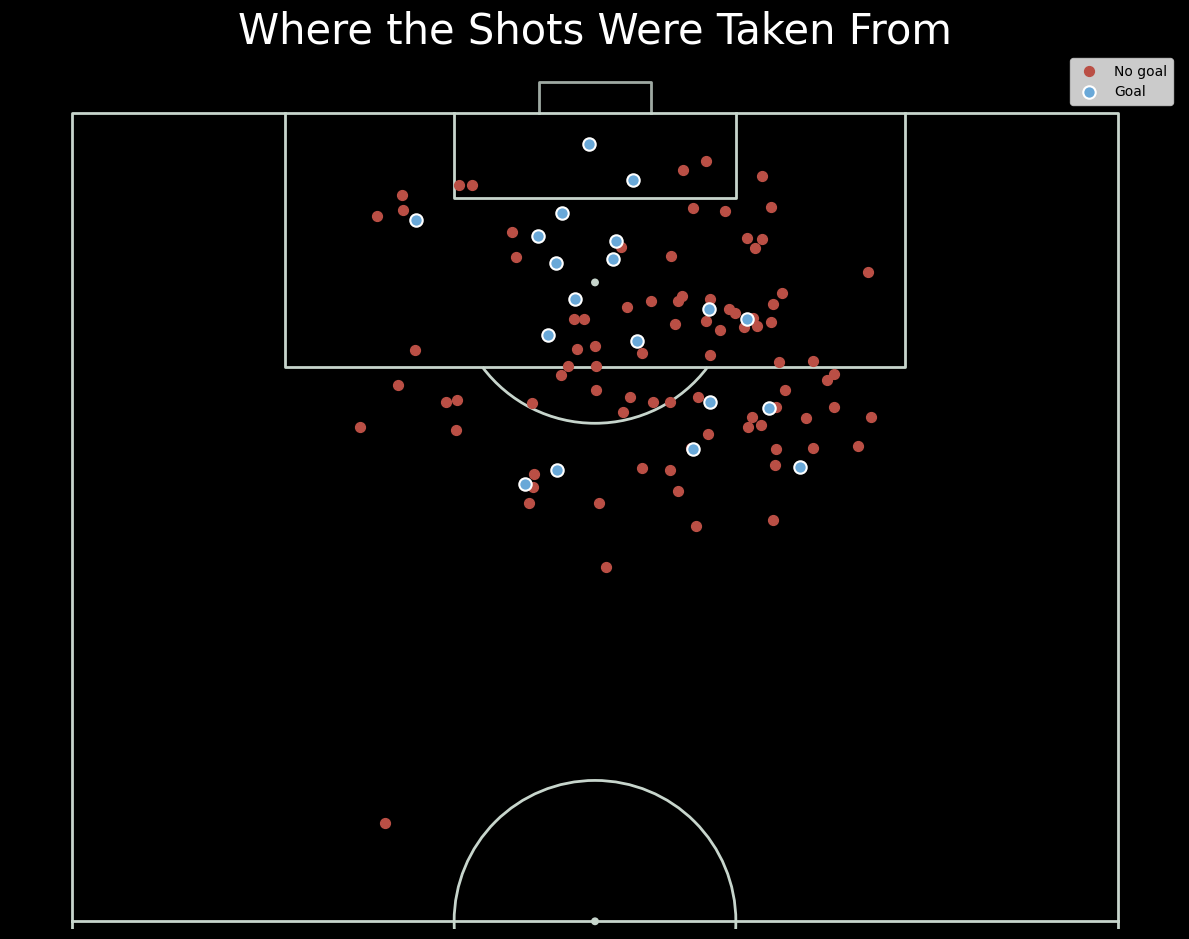

In [167]:
# visualizing shots
#ax.patch.set_facecolor('#0B0B0B')
# filter goals / non-shot goals
df_goals = man_city_shots[man_city_shots.eventType == 'Goal'].copy()
df_non_goal_shots = man_city_shots[man_city_shots.eventType != 'Goal'].copy()

# setup the pitch
pitch = VerticalPitch(pitch_type='custom',
                      pitch_length = 105,
                      pitch_width = 68,
                      pad_bottom=0.5,  # pitch extends slightly below halfway line
                      half=True,  # half of a pitch
                      goal_type='box',
                      goal_alpha=0.8, pitch_color='black', line_color='#c7d5cc')  # control the goal transparency

fig, ax = pitch.draw(figsize=(12, 10))
fig.set_facecolor('black')
sc1 = pitch.scatter(df_non_goal_shots.x, df_non_goal_shots.y,
                    c='#ba4f45',
                    marker='o', s=50,
                    ax=ax, label="No goal")

sc2 = pitch.scatter(df_goals.x, df_goals.y,
                    c='#69A8D8',
                    marker='o', s = 80 , edgecolor = 'white' , linewidth = 1.5,
                    ax=ax, label="Goal")

plt.title("Where the Shots Were Taken From",color='white', fontsize=30,ha='center')
plt.legend(loc='best')
plt.savefig('C:/Users/acer/Desktop/IndianCityzen/Projects/Images/ShotMaps/FodenShotMap3.png',dpi=300,bbox_inches = 'tight',facecolor='black')

## Manchester City Shots

In [7]:
man_city_shots = final_shots_df.loc[final_shots_df['teamName'] == 'Man City']

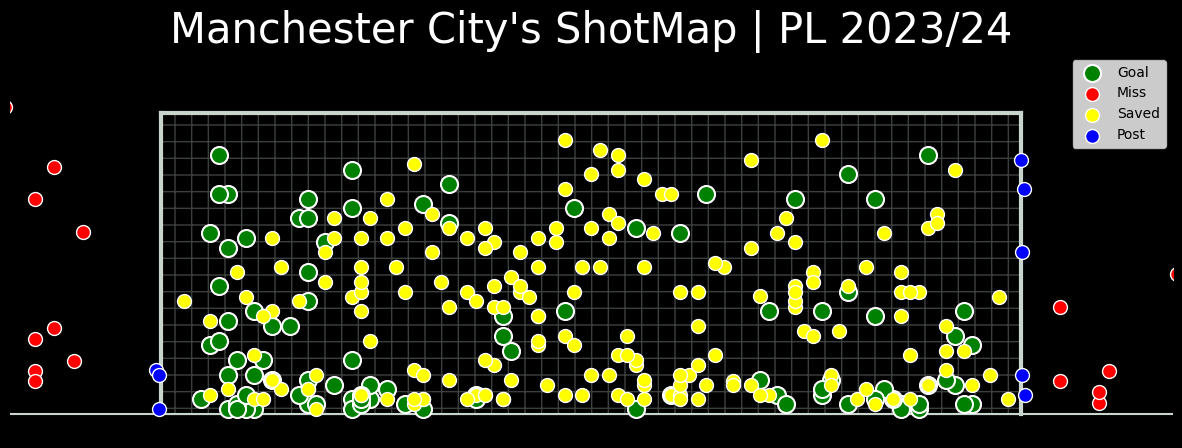

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mplsoccer import Pitch, VerticalPitch, FontManager
from mplsoccer import Sbopen
from matplotlib.patches import Rectangle

#Create figure
fig=plt.figure(facecolor='black')
fig.set_size_inches(15, 5)

#plt.gca().invert_xaxis()

# Goal post lines (shifted to the left by 1 unit)
plt.plot([29, 39], [0, 0], color='#c7d5cc', linewidth=1.5)
plt.plot([30.3, 37.7], [2.5, 2.5], color='#c7d5cc', linewidth=3)
plt.plot([37.7, 37.7], [0, 2.5], color='#c7d5cc', linewidth=3)
plt.plot([30.3, 30.3], [0, 2.5], color='#c7d5cc', linewidth=3)

# Goal net (shifted to the left by 1 unit)
plt.gca().add_patch(Rectangle((30.3, 0), 7.4, 2.5, fill=False, edgecolor='#c7d5cc', hatch='+', alpha=0.3))

#plt.gca().invert_yaxis()
#Tidy Axes
plt.axis('off')

plt.title("Manchester City's ShotMap | PL 2023/24",color='white', fontsize=30,ha='center')

goal_mask = (man_city_shots.eventType == 'Goal') & (man_city_shots.isOwnGoal == False) 
sc1 = plt.scatter(68 - man_city_shots[goal_mask].goalCrossedY, man_city_shots[goal_mask].goalCrossedZ,marker='o', color='green', label='Goal',s=150,zorder=2,edgecolors = 'white',linewidths=1.5)

miss_mask = (man_city_shots.eventType == 'Miss') & (man_city_shots.isBlocked == False) 
sc2 = plt.scatter(68 - man_city_shots[miss_mask].goalCrossedY, man_city_shots[miss_mask].goalCrossedZ,marker='o', color='red', label='Miss',s=100,zorder=2,edgecolors = 'white',linewidths=1)

saved_mask = (man_city_shots.eventType == 'AttemptSaved') & (man_city_shots.isBlocked == False) 
sc3 = plt.scatter(68 - man_city_shots[saved_mask].goalCrossedY, man_city_shots[saved_mask].goalCrossedZ,marker='o', color='yellow', label='Saved',s=100,zorder=2,edgecolors = 'white',linewidths=1)

post_mask = man_city_shots.eventType == 'Post'
sc4 = plt.scatter(68 - man_city_shots[post_mask].goalCrossedY, man_city_shots[post_mask].goalCrossedZ,marker='o', color='blue', label='Post',s=100,zorder=2,edgecolors = 'white',linewidths=1)

plt.ylim(ymin=-0.2, ymax=3)
plt.xlim(xmin=29, xmax=39)
plt.legend(loc='best')

plt.savefig('C:/Users/acer/Desktop/IndianCityzen/Projects/Images/ShotMaps/CityShotMap.png',dpi=300,bbox_inches = 'tight',facecolor='black')

In [11]:
man_city_shots['zone'] = man_city_shots.apply(lambda x:zone(x), axis=1)

C:\Users\acer\AppData\Local\Temp\ipykernel_65620\3321154859.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  man_city_shots['zone'] = man_city_shots.apply(lambda x:zone(x), axis=1)


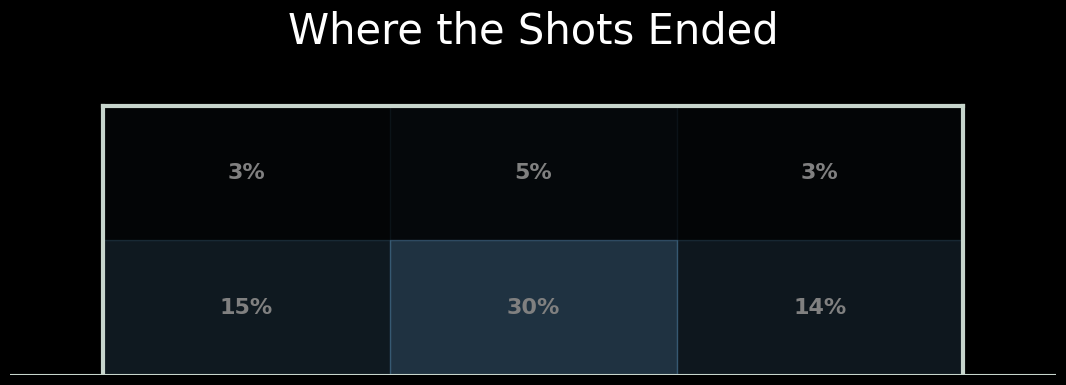

In [12]:
from matplotlib.patches import Rectangle

#Create figure
fig=plt.figure(facecolor='black')
fig.set_size_inches(13.5, 4.2)

#Goal post lines
plt.plot([29.5, 38.5], [0, 0], color='#c7d5cc', linewidth=1.5)
plt.plot([30.3, 37.7], [2.5, 2.5], color='#c7d5cc', linewidth=3)
plt.plot([37.7, 37.7], [0, 2.5], color='#c7d5cc', linewidth=3)
plt.plot([30.3, 30.3], [0, 2.5], color='#c7d5cc', linewidth=3)

# Goal net (shifted to the left by 1 unit)
#plt.gca().add_patch(Rectangle((30.3, 0), 7.4, 2.5, fill=False, edgecolor='#c7d5cc', hatch='+', alpha=0.3))

total_shot = len(man_city_shots)
percentage = {}
for zone in man_city_shots['zone'].unique():
  percentage[zone] = round(len(man_city_shots.loc[man_city_shots['zone']==zone])/total_shot, 2)

#zone
plt.gca().add_patch(Rectangle((30.3, 0), 7.4/3, 2.5/2, color='#69A8D8', alpha=percentage['bottom left'])) # bottom left
plt.gca().add_patch(Rectangle((30.3, 2.5/2), 7.4/3, 2.5/2, color='#69A8D8', alpha=percentage['top left'])) # top left
plt.gca().add_patch(Rectangle((30.3+7.4/3, 0), 7.4/3, 2.5/2, color='#69A8D8', alpha=percentage['bottom center'])) # bottom center
plt.gca().add_patch(Rectangle((30.3+7.4/3, 2.5/2), 7.4/3, 2.5/2, color='#69A8D8', alpha=percentage['top center'])) # top center
plt.gca().add_patch(Rectangle((30.3+2*7.4/3, 0), 7.4/3, 2.5/2, color='#69A8D8', alpha=percentage['bottom right'])) # bottom right
plt.gca().add_patch(Rectangle((30.3+2*7.4/3, 2.5/2), 7.4/3, 2.5/2, color='#69A8D8', alpha=percentage['top right'])) # top right


#Tidy Axes
plt.axis('off')

plt.title("Where the Shots Ended",color='white', fontsize=30,ha='center')

plt.text(x=30.3+7.4/6, y=2.5/4, s="{}%".format(round(100*percentage['bottom left'])), color='gray', fontsize=16, weight="bold", ha='center', va='center')
plt.text(x=30.3+7.4/6, y=3*2.5/4, s="{}%".format(round(100*percentage['top left'])), color='gray', fontsize=16, weight="bold", ha='center', va='center')
plt.text(x=30.3+3*7.4/6, y=2.5/4, s="{}%".format(round(100*percentage['bottom center'])), color='gray', fontsize=16, weight="bold", ha='center', va='center')
plt.text(x=30.3+3*7.4/6, y=3*2.5/4, s="{}%".format(round(100*percentage['top center'])), color='gray', fontsize=16, weight="bold", ha='center', va='center')
plt.text(x=30.3+5*7.4/6, y=2.5/4, s="{}%".format(round(100*percentage['bottom right'])), color='gray', fontsize=16, weight="bold", ha='center', va='center')
plt.text(x=30.3+5*7.4/6, y=3*2.5/4, s="{}%".format(round(100*percentage['top right'])), color='gray', fontsize=16, weight="bold", ha='center', va='center')


plt.ylim(ymin=0, ymax=3)
plt.xlim(xmin=29.5, xmax=38.5)
# plt.legend()
plt.savefig('C:/Users/acer/Desktop/IndianCityzen/Projects/Images/ShotMaps/CityShotMap2.png',dpi=300,bbox_inches = 'tight',facecolor='black')

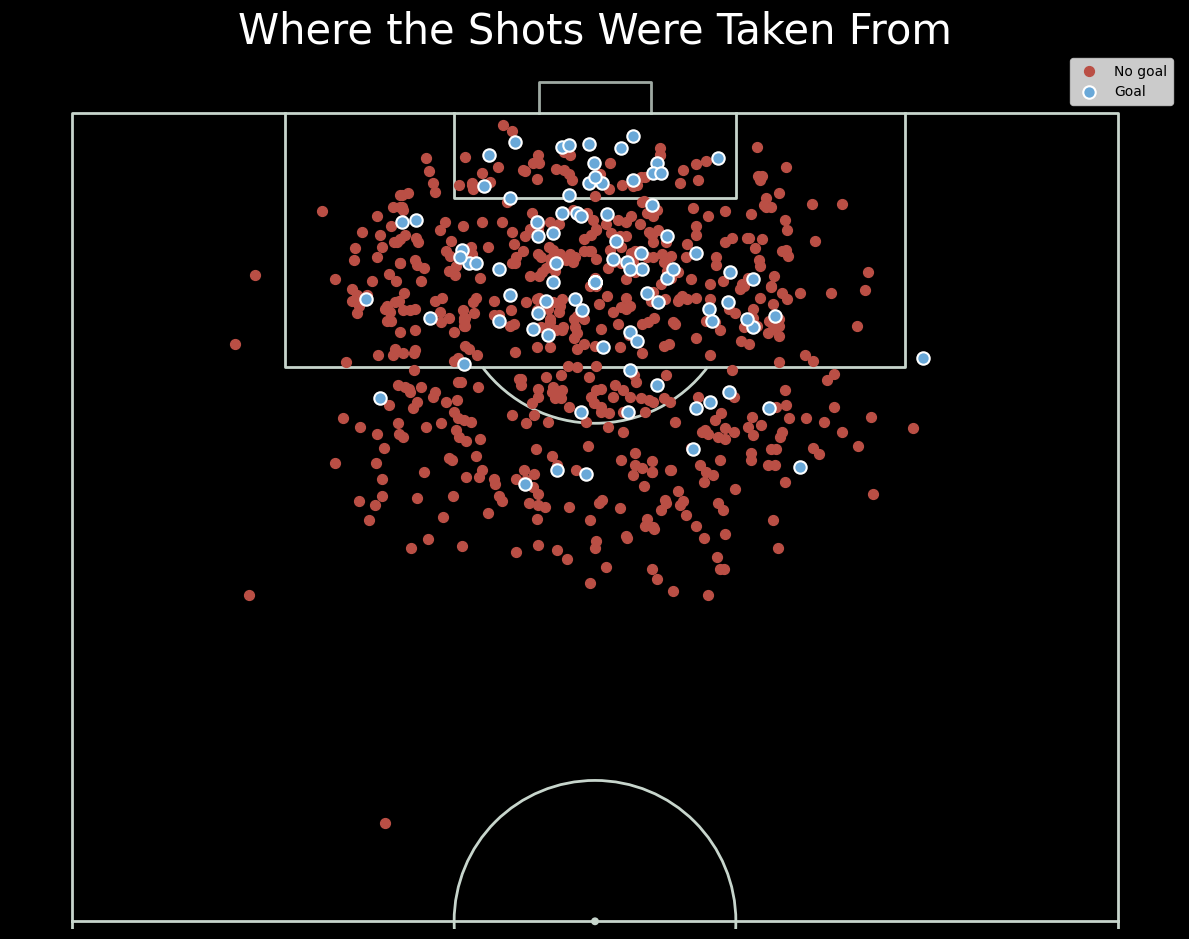

In [13]:
# visualizing shots
#ax.patch.set_facecolor('#0B0B0B')
# filter goals / non-shot goals
df_goals = man_city_shots[man_city_shots.eventType == 'Goal'].copy()
df_non_goal_shots = man_city_shots[man_city_shots.eventType != 'Goal'].copy()

# setup the pitch
pitch = VerticalPitch(pitch_type='custom',
                      pitch_length = 105,
                      pitch_width = 68,
                      pad_bottom=0.5,  # pitch extends slightly below halfway line
                      half=True,  # half of a pitch
                      goal_type='box',
                      goal_alpha=0.8, pitch_color='black', line_color='#c7d5cc')  # control the goal transparency

fig, ax = pitch.draw(figsize=(12, 10))
fig.set_facecolor('black')
sc1 = pitch.scatter(df_non_goal_shots.x, df_non_goal_shots.y,
                    c='#ba4f45',
                    marker='o', s=50,
                    ax=ax, label="No goal")

sc2 = pitch.scatter(df_goals.x, df_goals.y,
                    c='#69A8D8',
                    marker='o', s = 80 , edgecolor = 'white' , linewidth = 1.5,
                    ax=ax, label="Goal")

plt.title("Where the Shots Were Taken From",color='white', fontsize=30,ha='center')
plt.legend(loc='best')
plt.savefig('C:/Users/acer/Desktop/IndianCityzen/Projects/Images/ShotMaps/CityShotMap3.png',dpi=300,bbox_inches = 'tight',facecolor='black')